# Importo librerias

In [50]:
import os

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from tqdm import tqdm

from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from scipy.stats import chi2

In [51]:
def obtener_espectros(ruta, sep = ',', sep_str = ';'):
    #ruta  -->   Debe ser la dirección de la carpeta correspondiente al elemento
    mediciones = os.listdir(ruta)
    
    #-----------------------
    # Cargo las mediciones
    #-----------------------
    lamb_e, I_e = [], []
    for med in tqdm(mediciones):
        if med[-4:] == '.csv':
            ruta_med = ruta + f'/{med}'
            df = pd.read_csv(ruta_med, sep = sep)[52 : -1].astype('string').to_numpy()[:, 0]
            datai = [ (data.split(sep_str)) for data in df]
            
            lamb_i = [ float(di[0]) for di in datai]
            I_i = [ float(di[1]) for di in datai]
            lamb_e.append(lamb_i), I_e.append(I_i)
            
    lamb_e, I_e = np.array(lamb_e), np.array(I_e)
    
    #----------------------
    # Valor medio y std
    #----------------------
    I, err_I = [], []
    lamb, err_lamb = [], []
    for i in range(0, len(lamb_i)):
        I.append(np.mean(I_e[:, i])), err_I.append(np.std(I_e[:, i]))
        lamb.append(np.mean(lamb_e[:, i])), err_lamb.append(np.std(lamb_e[:, i]))
        
    """
    Primera lista:
        * Elemento_0: lista de valores medios sobre longitud de onda
        * Elemento_1: lista de valores std sobre longitud de onda
    Segunda lista:
        * Elemento_0: lista de valores medios sobre intensidad
        * Elemento_1: lista de valores std sobre intensidad
    """
    return [lamb, err_lamb], [I, err_I]


In [52]:
ruta_mediciones = 'Mediciones_dia2/Rhodamina'
conc = os.listdir(ruta_mediciones)

lamb_emi, I_emi = [], []
lamb_abs, I_abs = [], []

for concen in conc:
    print(concen)
    ruta_conc = ruta_mediciones + f'/{concen}'
    secc = os.listdir(ruta_conc)

    #lamb_emi_i, I_emi_i = [], []
    #lamb_abs_i, I_abs_i = [], []
    for sec in secc:
        print(sec)
        ruta_final = ruta_conc + f'/{sec}'
        lamb_i, I_i = obtener_espectros(ruta_final)

        if sec == 'Abs':
            lamb_emi.append(lamb_i), I_emi.append(I_i)
        else:
            lamb_abs.append(lamb_i), I_abs.append(I_i)
    
    #lamb_emi.append(lamb_emi_i), I_emi.append(I_emi_i)
    #lamb_abs.append(lamb_abs_i), I_abs.append(I_abs_i)

        

1.24e-4
Abs


100%|██████████| 1087/1087 [00:11<00:00, 96.42it/s] 


Emi


100%|██████████| 1041/1041 [00:10<00:00, 99.53it/s] 


1.2e-5
Abs


100%|██████████| 1059/1059 [00:10<00:00, 98.33it/s] 


Emi


100%|██████████| 1047/1047 [00:10<00:00, 99.84it/s] 


1.5e-4
Abs


100%|██████████| 1089/1089 [00:11<00:00, 97.10it/s] 


Emi


100%|██████████| 1041/1041 [00:10<00:00, 99.10it/s] 


1.65e-5
Abs


100%|██████████| 1048/1048 [00:10<00:00, 97.65it/s] 


Emi


100%|██████████| 1040/1040 [00:10<00:00, 97.76it/s] 


3.5e-5
Abs


100%|██████████| 1040/1040 [00:10<00:00, 96.98it/s] 


Emi


100%|██████████| 1053/1053 [00:10<00:00, 98.88it/s] 


3.65e-5
Abs


100%|██████████| 1104/1104 [00:11<00:00, 96.66it/s] 


Emi


100%|██████████| 1025/1025 [00:10<00:00, 98.08it/s]


3e-6
Abs


100%|██████████| 1042/1042 [00:10<00:00, 99.70it/s] 


Emi


100%|██████████| 1032/1032 [00:10<00:00, 96.76it/s] 


7.5e-6
Abs


100%|██████████| 1057/1057 [00:10<00:00, 99.75it/s] 


Emi


100%|██████████| 946/946 [00:09<00:00, 97.00it/s] 


7e-5
Abs


100%|██████████| 1122/1122 [00:11<00:00, 98.73it/s] 


Emi


100%|██████████| 1224/1224 [00:12<00:00, 96.92it/s] 


9.75e-6
Abs


100%|██████████| 1071/1071 [00:10<00:00, 98.15it/s] 


Emi


100%|██████████| 1041/1041 [00:10<00:00, 97.03it/s] 


9.7e-5
Abs


100%|██████████| 1078/1078 [00:10<00:00, 99.73it/s] 


Emi


100%|██████████| 1028/1028 [00:10<00:00, 96.88it/s] 


Control
Abs


100%|██████████| 1010/1010 [00:10<00:00, 98.09it/s]


Emi


100%|██████████| 1062/1062 [00:11<00:00, 96.01it/s] 


# Vemos los datos

## Todos por separado

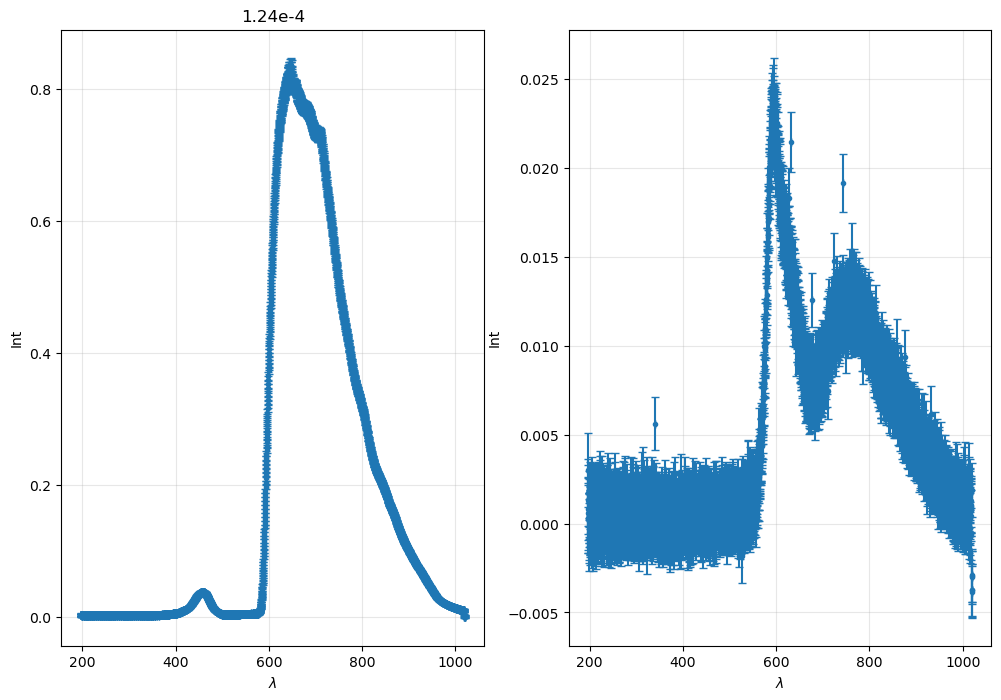

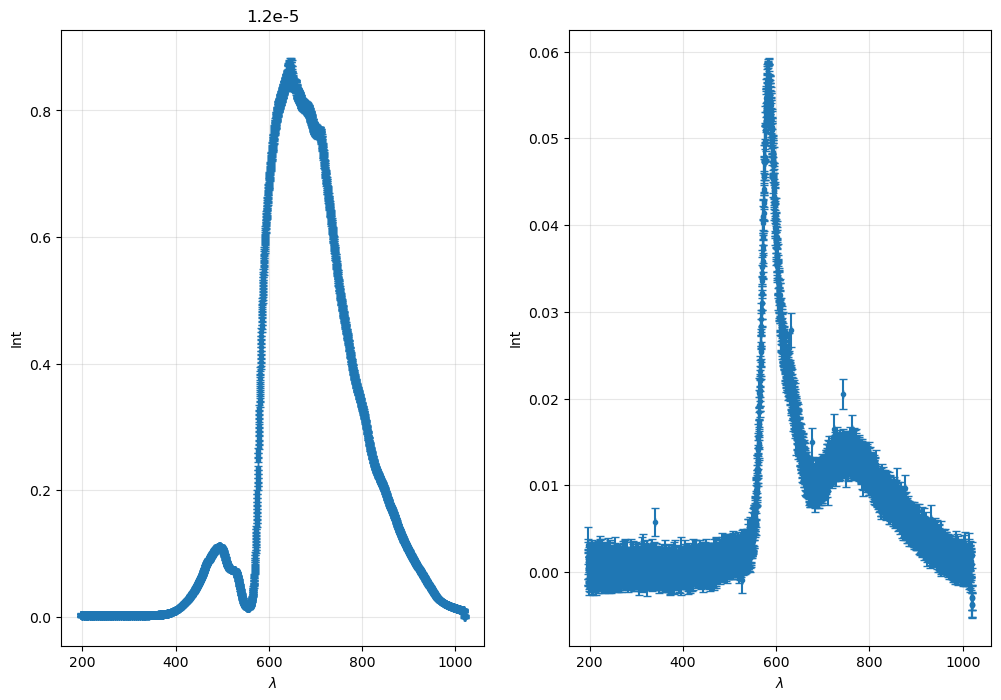

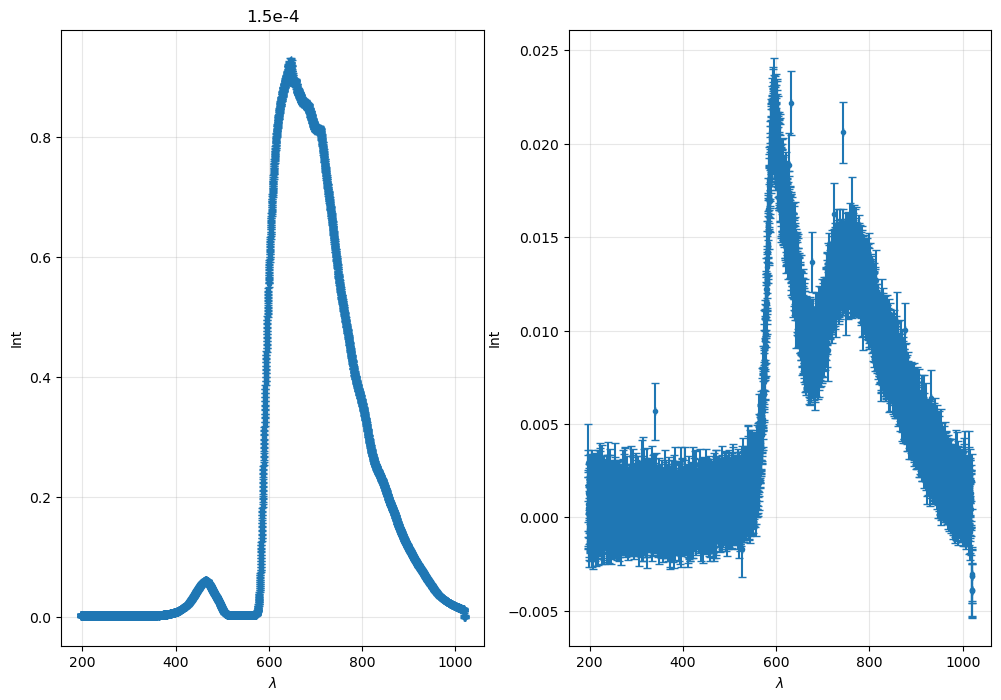

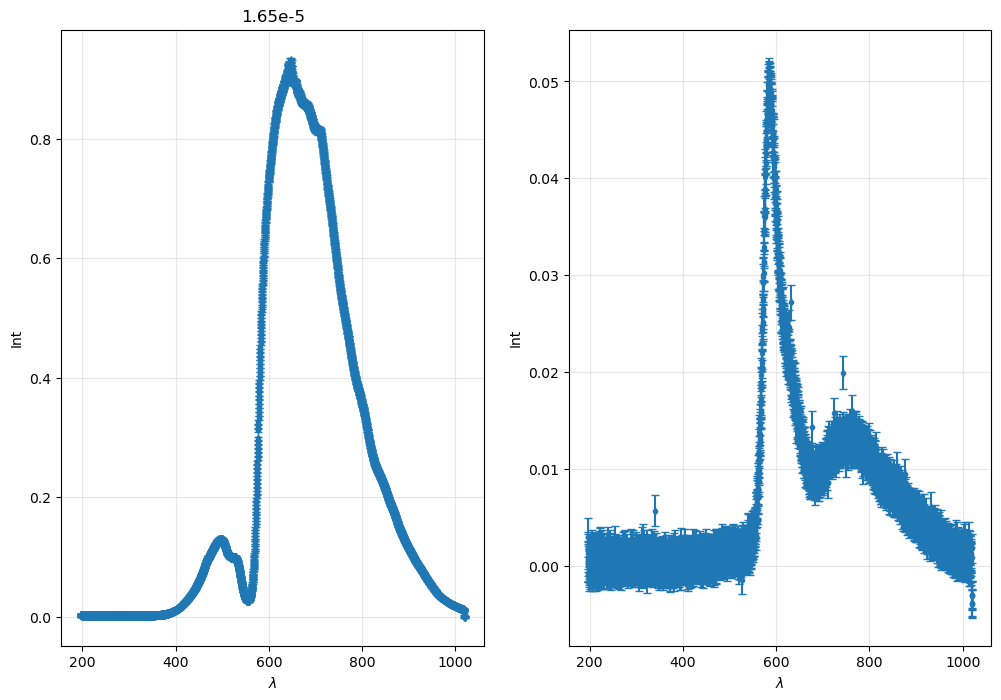

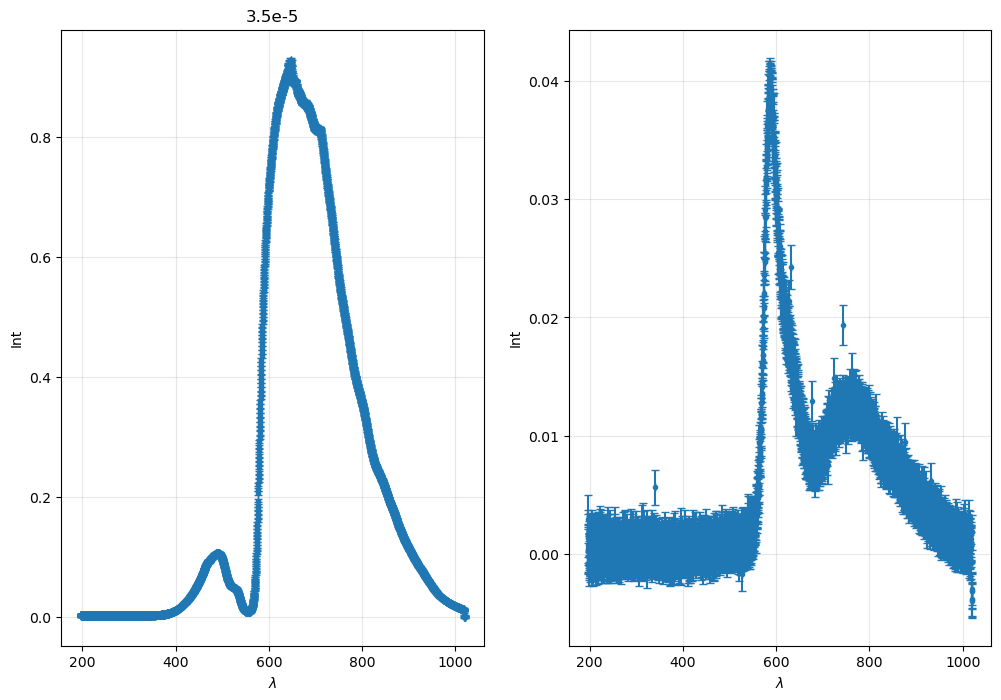

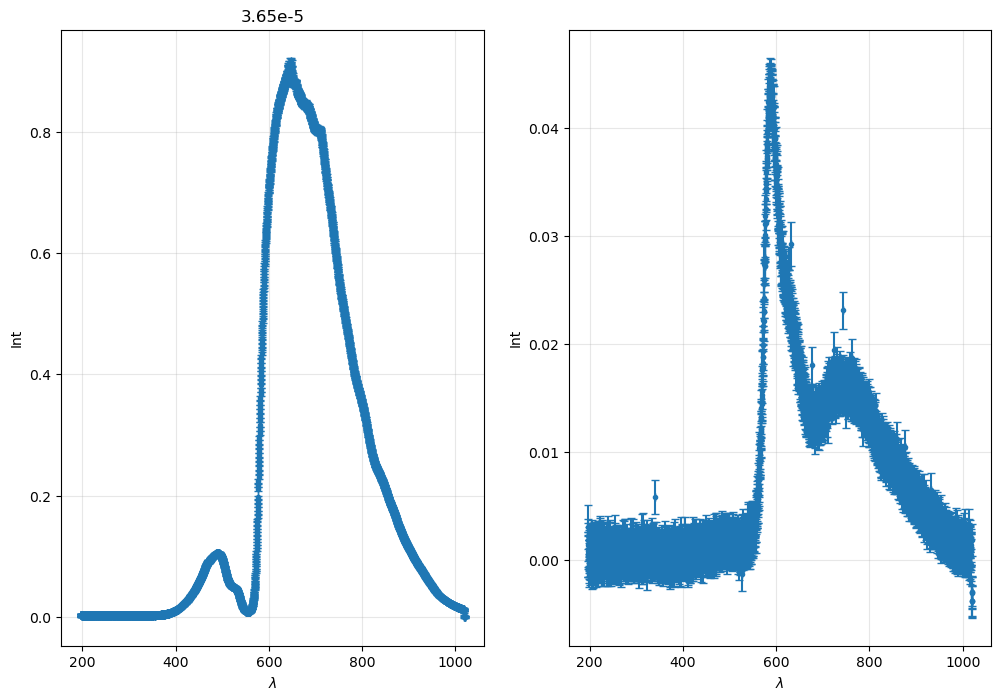

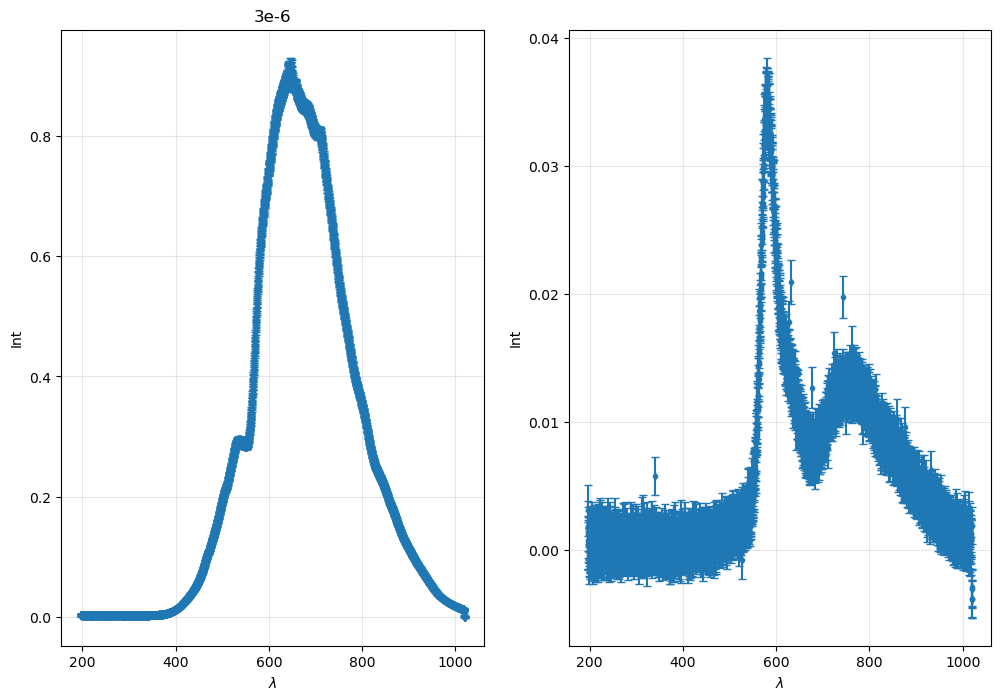

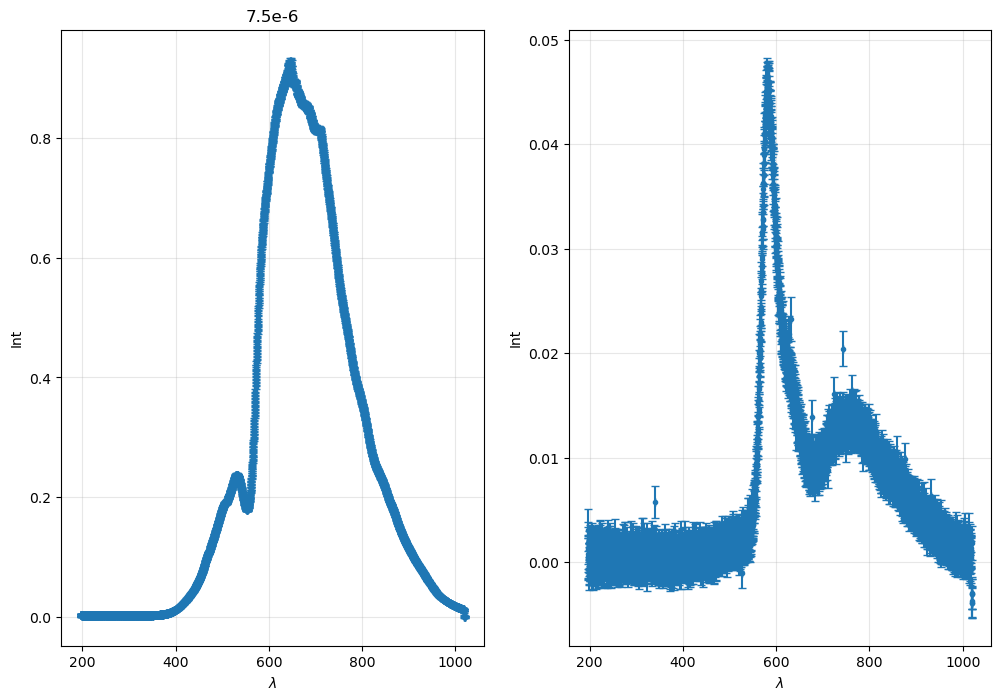

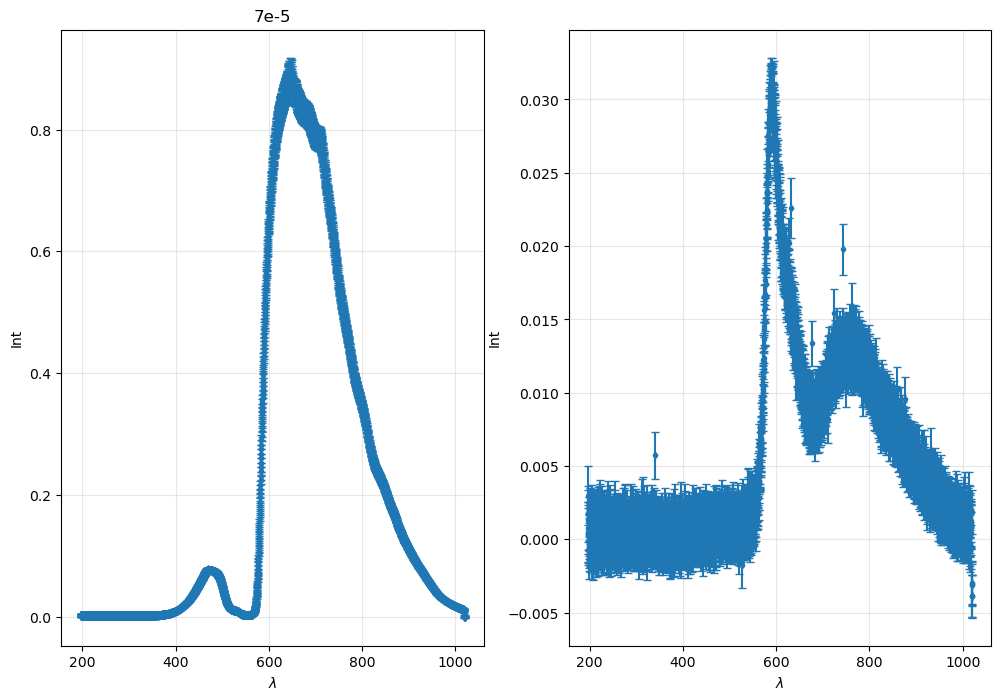

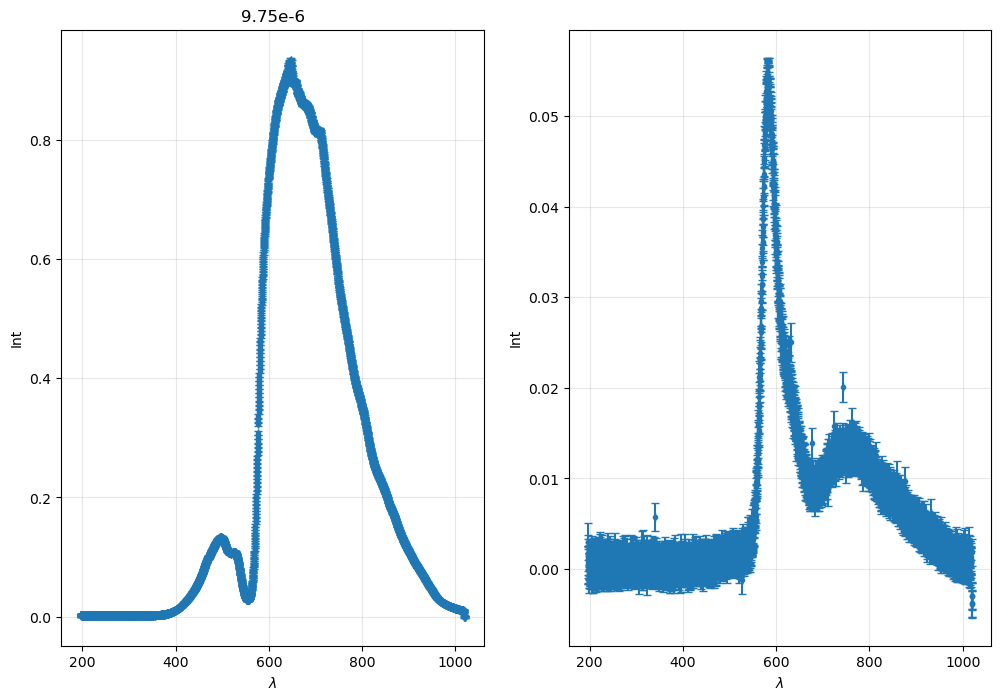

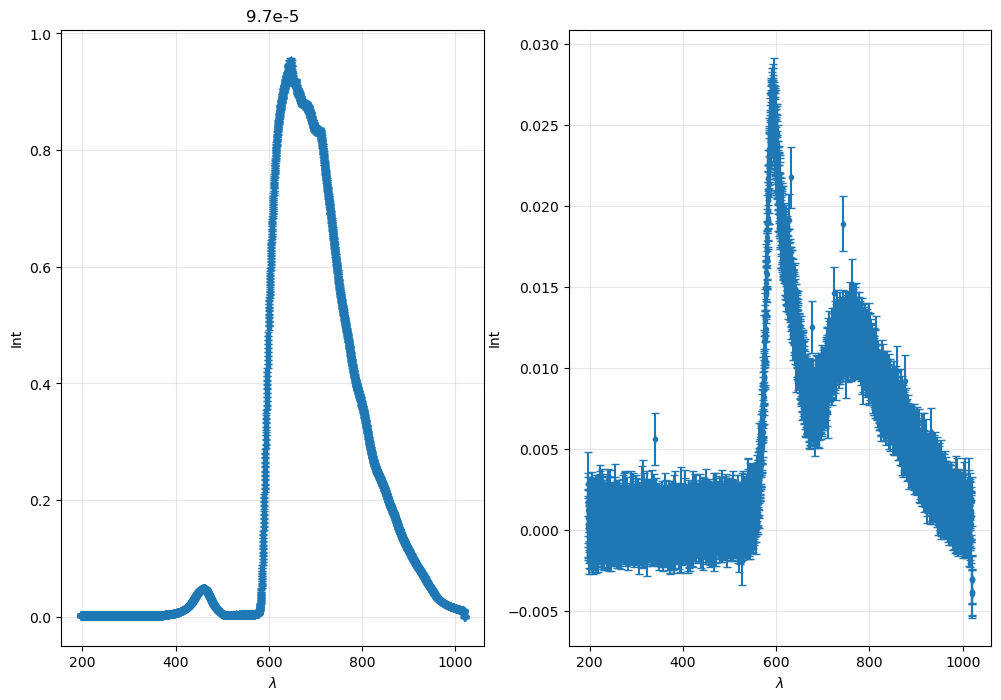

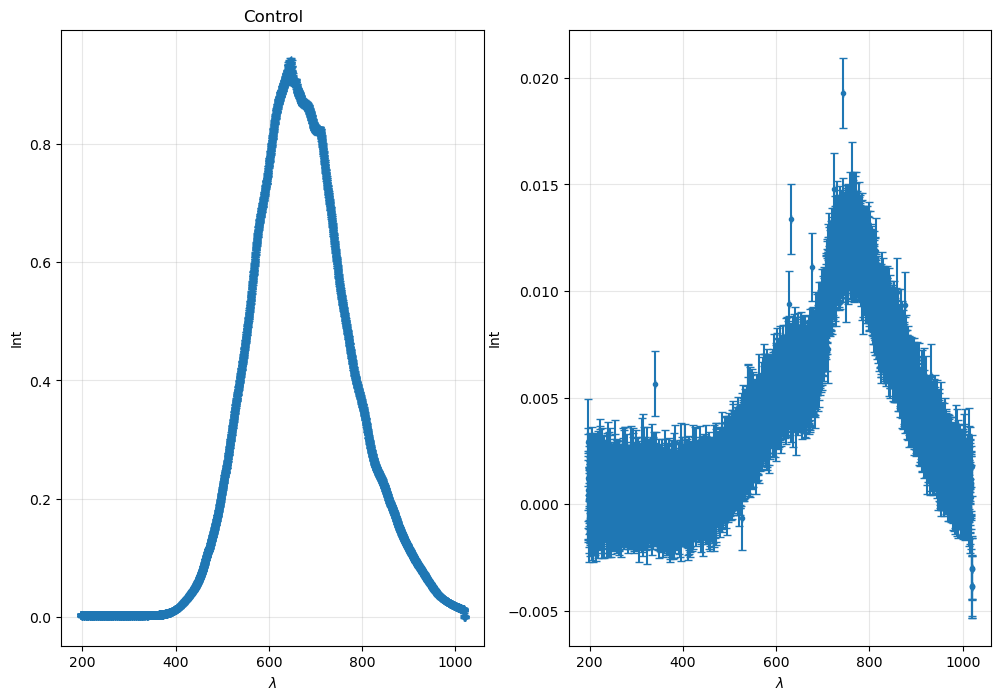

In [53]:
for i in range(0, len(lamb_emi)):
    lamb_emi_j, err_lamb_emi_j = lamb_emi[i]
    Int_emi_j, err_Int_emi_j = I_emi[i]

    lamb_abs_j, err_lamb_abs_j = lamb_abs[i]
    Int_abs_j, err_Int_abs_j = I_abs[i]

    fig, axs = plt.subplots(1, 2, figsize = (12, 8))

    #-----Emision-----
    axs[0].errorbar(lamb_emi_j, Int_emi_j, yerr = err_Int_emi_j, xerr = err_lamb_emi_j,
                    fmt = '.', capsize = 3)
    axs[0].set(ylabel = 'Int', xlabel = r'$\lambda$', title = f'{conc[i]}')
    axs[0].grid(alpha = 0.3)

    axs[1].errorbar(lamb_abs_j, Int_abs_j, yerr = err_Int_abs_j, xerr = err_lamb_abs_j,
                    fmt = '.', capsize = 3)
    axs[1].set(ylabel = 'Int', xlabel = r'$\lambda$')
    axs[1].grid(alpha = 0.3)

    plt.show()
    

C:\Users\publico\AppData\Local\Temp\ipykernel_13836\1060349569.py:41: RuntimeWarning: invalid value encountered in log10
  axs[1, 1].plot(lamb_abs_j, -np.log10(Int_abs_j/Int_abs_ref), label = f'{conc[i]}')


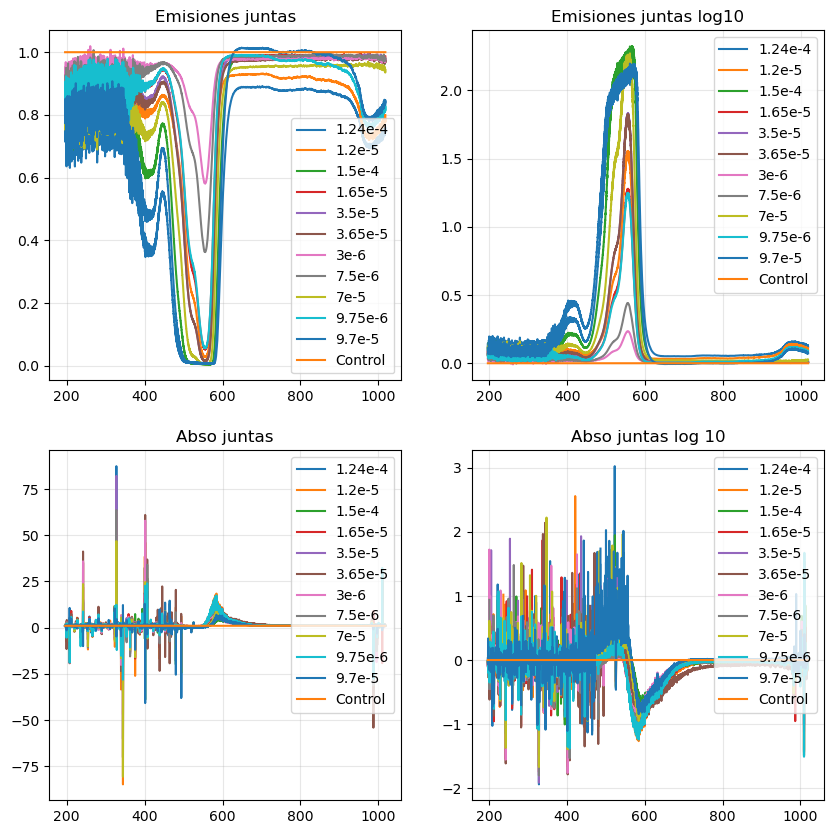

In [54]:
fig, axs = plt.subplots(2, 2, figsize = (10, 10))
N = 10
for i in range(0, len(lamb_emi)):
    # Definimos la referencia
    Int_emi_ref, err_Int_emi_ref = np.array(I_emi[-1])
    Int_abs_ref, err_Int_abs_ref = np.array(I_abs[-1])

    lamb_emi_j, err_lamb_emi_j = np.array(lamb_emi[i])
    Int_emi_j, err_Int_emi_j = np.array(I_emi[i])

    lamb_abs_j, err_lamb_abs_j = np.array(lamb_abs[i])
    Int_abs_j, err_Int_abs_j = np.array(I_abs[i])

    #-----------------
    # Emisiones juntas
    #-----------------
    axs[0, 0].plot(lamb_emi_j[:-N], Int_emi_j[:-N]/Int_emi_ref[:-N], label = f'{conc[i]}')
    axs[0, 0].set(title = 'Emisiones juntas')
    axs[0, 0].legend()
    axs[0, 0].grid(alpha = 0.3)
    
    #----------------------
    # Emisiones juntas log10
    #---------------------
    axs[0, 1].plot(lamb_emi_j[:-N], -np.log10(Int_emi_j[:-N]/Int_emi_ref[:-N]), label = f'{conc[i]}')
    axs[0, 1].set(title = 'Emisiones juntas log10')
    axs[0, 1].legend()
    axs[0, 1].grid(alpha = 0.3)
    
    #-----------------
    # Abso juntas
    #-----------------
    axs[1, 0].plot(lamb_abs_j[:-N], Int_abs_j[:-N]/Int_abs_ref[:-N], label = f'{conc[i]}')
    axs[1, 0].set(title = 'Abso juntas')
    axs[1, 0].legend()
    axs[1, 0].grid(alpha = 0.3)
    
    #-----------------
    # Abso juntas log10
    #-----------------
    axs[1, 1].plot(lamb_abs_j, -np.log10(Int_abs_j/Int_abs_ref), label = f'{conc[i]}')
    axs[1, 1].set(title = 'Abso juntas log 10')
    axs[1, 1].legend()
    axs[1, 1].grid(alpha = 0.3)
plt.show()
